In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster
from yellowbrick.cluster import KElbowVisualizer

from ihop.community2vec import GensimCommunity2Vec

sns.set_palette("Dark2")

In [2]:

DATA_ROOT = Path("../data")
C2V_ROOT = DATA_ROOT / "community2vec"
STABILITY_METRICS_ROOT = DATA_ROOT / "cluster_stability"

MONTHS = sorted(["2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10", "2021-11", "2021-12", "2022-01", "2022-02", "2022-03"
])

C2V_MODELS = [GensimCommunity2Vec.load(C2V_ROOT / f"RC_{m}"/"best_model") for m in MONTHS]

SUBREDDIT_COUNTS_CSVS = [C2V_ROOT / f"RC_{m}" / "subreddit_counts.csv" for m in MONTHS]

# Set up for k-means clustering
RANDOM_SEEDS = [7, 17, 29, 32, 42, 53, 63, 70, 84, 96]
NUM_CLUSTERS = [5, 10, 50, 100, 175, 250, 400]

# KMeans Clustering Elbow Heuristic
These diagrams demonstrate using the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) to determine the appropriate number of clusters of subreddits in KMeans for each month. Ultimately, we'd like to use the granularity of clustering that provides the best human interpretability, but this method gives an indication of a good cut-off, where increasing the number of clusters will not give quantitative gains. 

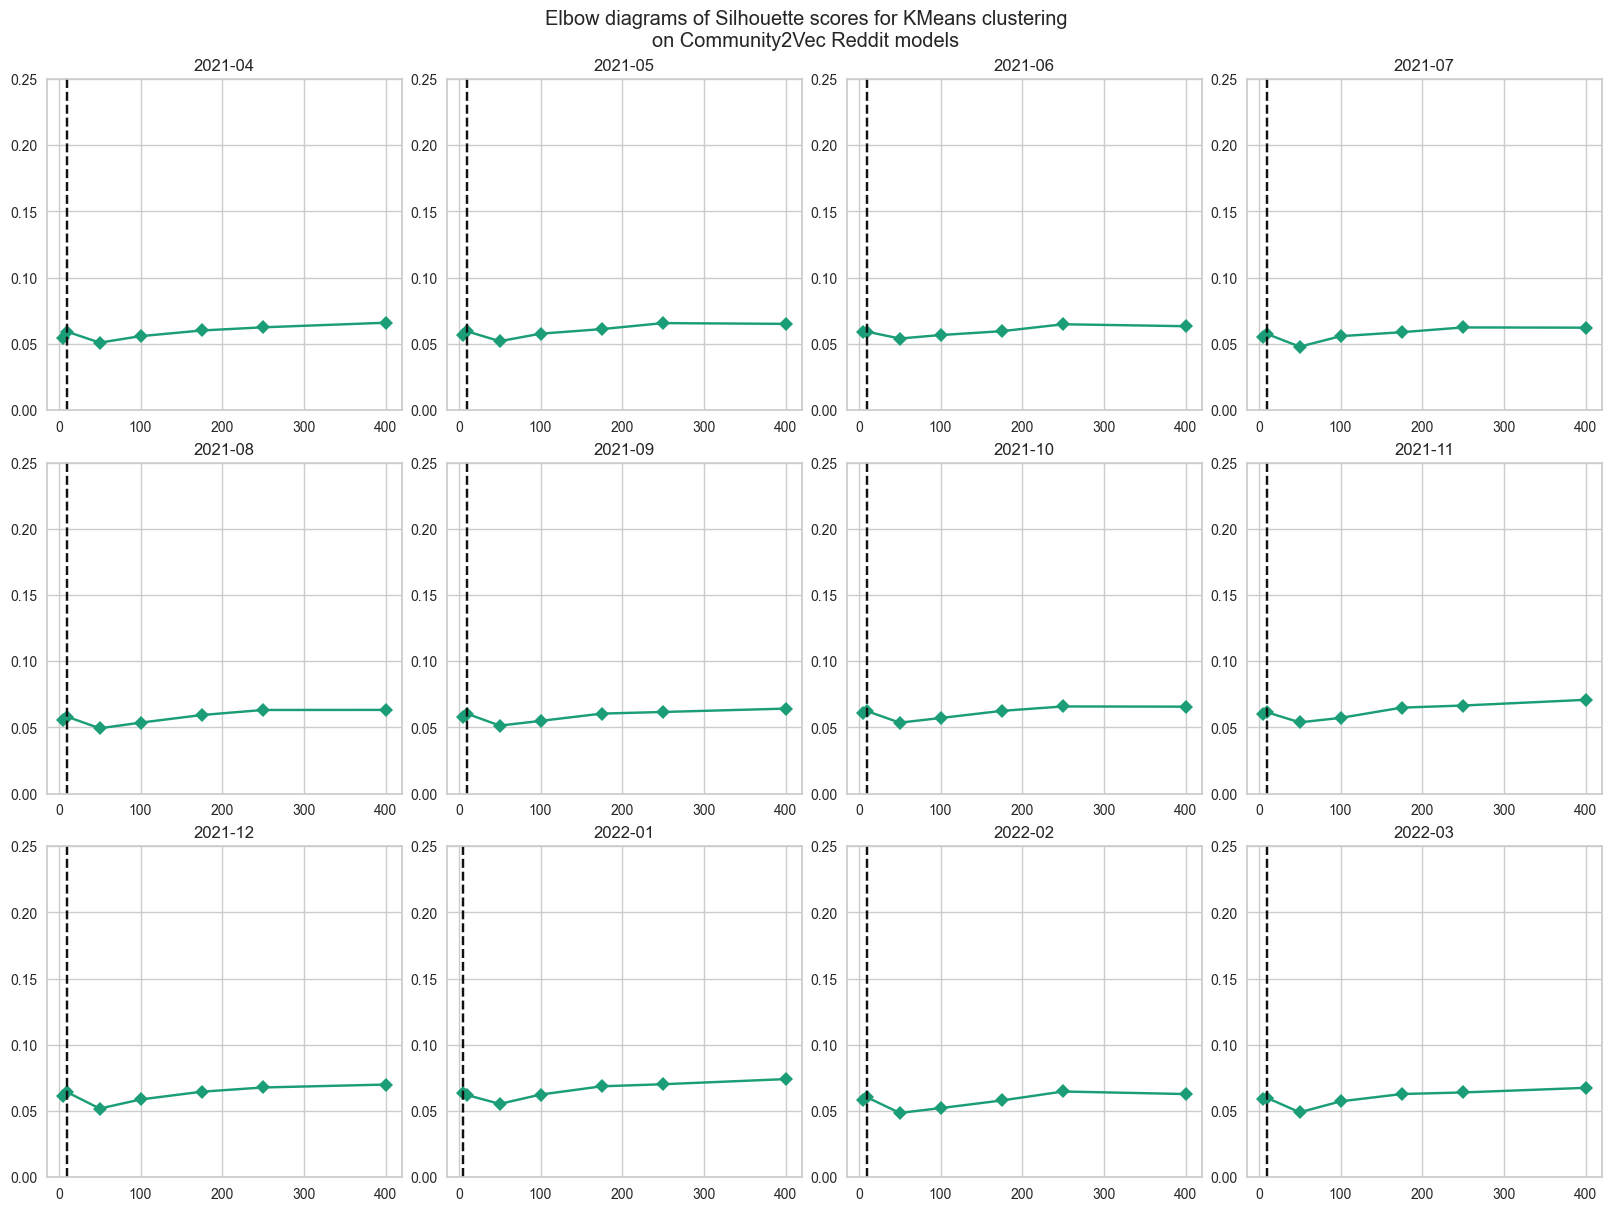

<Figure size 800x550 with 0 Axes>

In [3]:
# Use the Elbow methd to show if there's a "good" number of clusters that can be used
ax_counter = 0
nrows = 3
ncols = 4
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16,12), constrained_layout=True)
fig.suptitle("Elbow diagrams of Silhouette scores for KMeans clustering\non Community2Vec Reddit models")
for month, c2v_model in zip(MONTHS, C2V_MODELS):
    row = int(ax_counter / ncols) 
    col = ax_counter % ncols
    ax = axes[row, col]
    ax.set(ylim=(0, 0.25))
    key_vectors = c2v_model.get_normed_vectors()
    kmeans_model = sklearn.cluster.KMeans(random_state=100)
    viz = KElbowVisualizer(kmeans_model, k=NUM_CLUSTERS, metric='silhouette', ax = ax, timings=False)
    ax.set_title(month)
    viz.fit(key_vectors)

    ax_counter +=1

plt.show()
plt.clf()


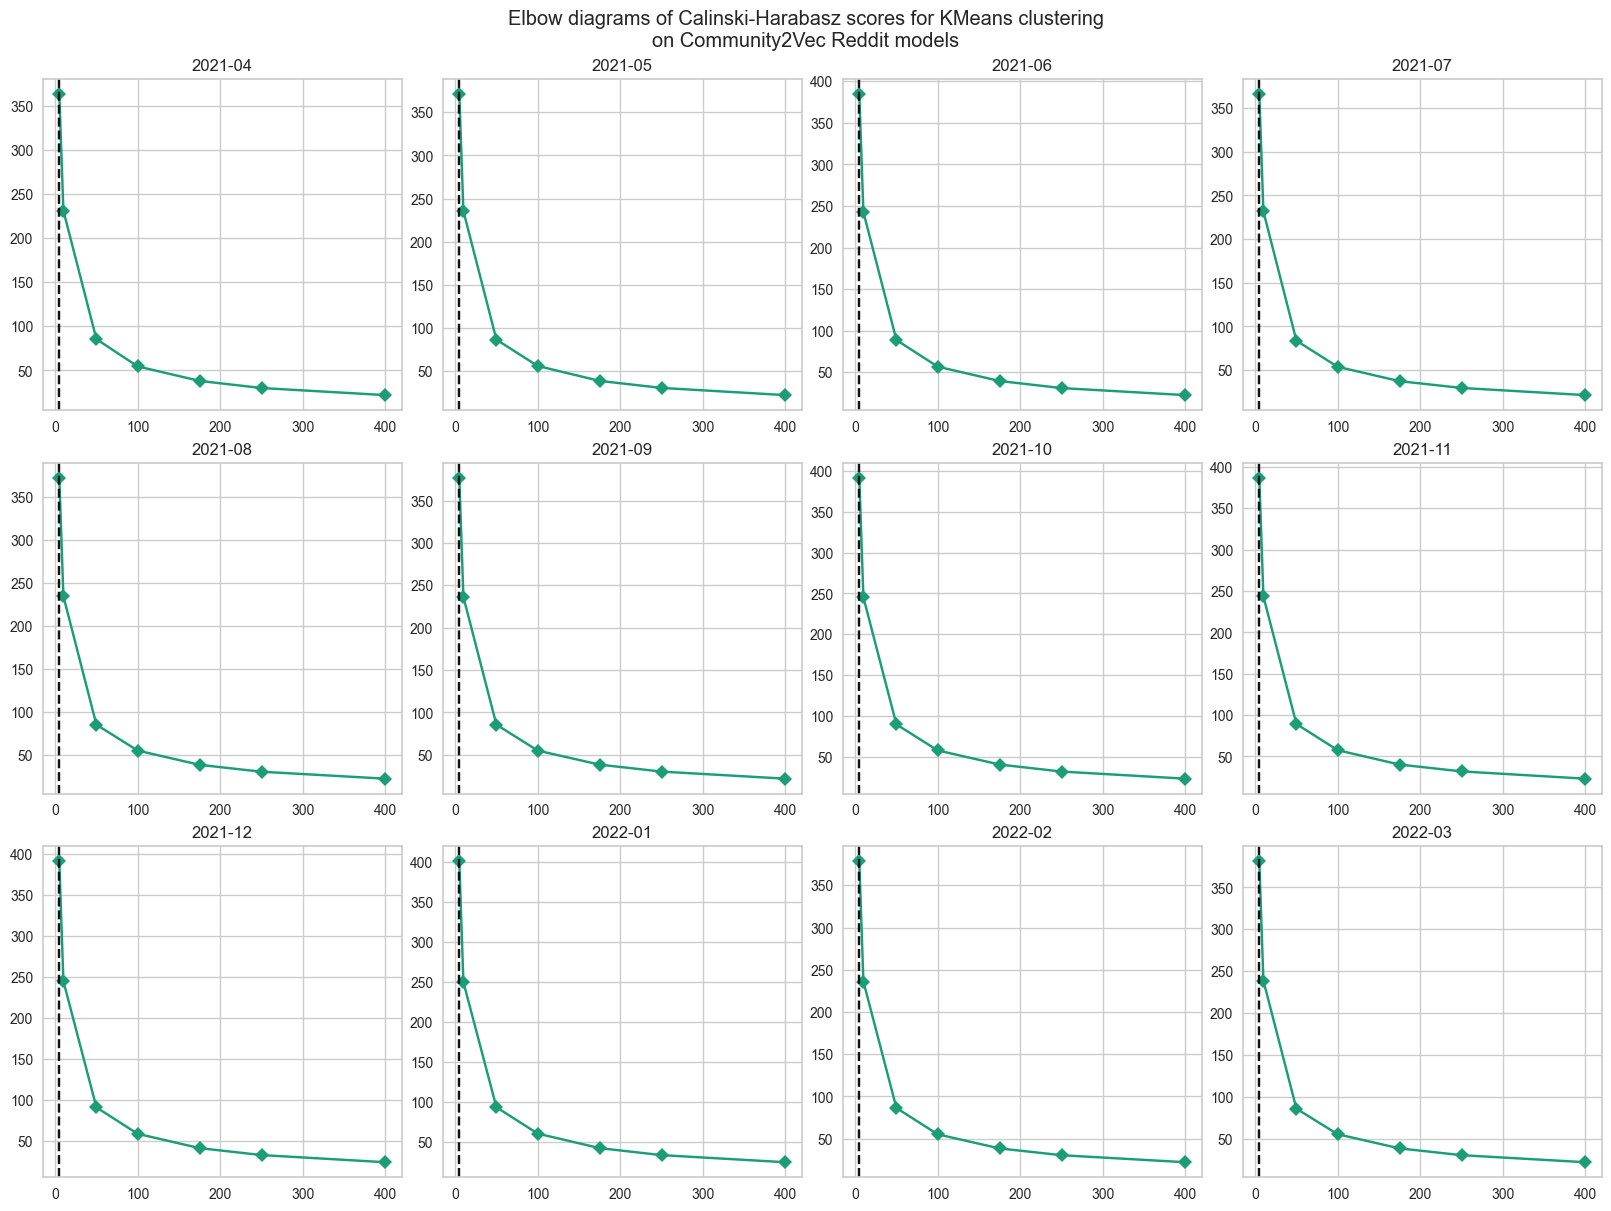

<Figure size 800x550 with 0 Axes>

In [4]:
# Use the Elbow methd to show if there's a "good" number of clusters that can be used
ax_counter = 0
nrows = 3
ncols = 4
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16,12), constrained_layout=True)
fig.suptitle("Elbow diagrams of Calinski-Harabasz scores for KMeans clustering\non Community2Vec Reddit models")
for month, c2v_model in zip(MONTHS, C2V_MODELS):
    row = int(ax_counter / ncols) 
    col = ax_counter % ncols
    ax = axes[row, col]
    key_vectors = c2v_model.get_normed_vectors()
    kmeans_model = sklearn.cluster.KMeans(random_state=100)
    viz = KElbowVisualizer(kmeans_model, k=NUM_CLUSTERS, metric='calinski_harabasz', ax = ax, timings=False)
    ax.set_title(month)
    viz.fit(key_vectors)

    ax_counter +=1

plt.show()
plt.clf()